In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('full_results.csv')

In [3]:
df.isnull().sum()

id               0
url              0
header           0
address          0
area             0
rooms            0
bathrooms        0
garages          0
amenities     1593
price            0
condo         1464
crawler          0
crawled_at       0
dtype: int64

In [4]:
all_columns = list(df.columns)
df[all_columns] = df[all_columns].astype(str)
df.describe()
###5184 unique id and 5184 unique url!#######

,id,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at
count,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184
unique,5184,5184,477,1333,213,5,6,7,1050,522,752,1,48
top,2516631001,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 70m²","Canasvieiras, Florianópolis - SC",60,2 Quartos,1 Banheiro,1 Vaga,nan,R$ 1.500 /mês,nan,Florianópolis,2021-05-24 01:28
freq,1,1,212,206,267,2298,3045,3409,1593,243,1464,5184,144


In [5]:
df['price'] = df['price'].str.extract('R\$ (.*) /mês')
df['price'] = df['price'].replace('\.','',regex=True)

df['condo'] = df['condo'].str.extract('R\$ (.*)')
df['condo'] = df['condo'].replace('\.','',regex=True)
df['condo'] = df['condo'].fillna(0)

df['garages'] = df['garages'].str.extract('(.*) Vaga')
df['bathrooms'] = df['bathrooms'].str.extract('(.*) Banheiro')
df['rooms'] = df['rooms'].str.extract('(.*) Quarto')

df['neighborhood'] = df.address.str.split('\s-').str[1]
df['neighborhood'] = df.neighborhood.str.split(',').str[0]

In [6]:
df['neighborhood'].unique()

array([' Balneario do Estreito', ' Córrego Grande', ' Pantanal',
       ' Rio Tavares', ' Jurerê Internacional', ' Itacorubi', ' Jurerê',
       ' Carvoeira', ' Cachoeira do Bom Jesus', ' Estreito', ' Centro',
       ' SC', ' Trindade', ' Santinho', ' Beira Mar', ' Agronômica',
       ' Ingleses do Rio Vermelho', ' Canasvieiras', ' Coqueiros',
       ' Ponta das Canas', ' Praia dos Ingleses', ' Campeche',
       ' Joao Paulo', ' Réis', ' Jardim Atlântico', ' Saco dos Limões',
       ' Lagoa da Conceição', ' Capoeiras', ' Monte Verde', ' Abraão',
       ' Praia Brava', ' Barra da Lagoa', ' Santa Mônica',
       ' Ribeirão da Ilha', ' Balneário', ' José Mendes', ' Saco Grande',
       ' São João do Rio Vermelho', ' Armação', ' Costeira do Pirajubaé',
       ' Itaguaçu', ' Ingleses Norte', ' Carianos',
       ' Armação do Pântano do Sul', ' Bom Abrigo', ' Açores',
       ' Monte Cristo', ' Santo Antônio de Lisboa', ' Vargem Grande',
       ' Barreiros', ' Canto', ' Morro das Pedras', ' Ca

In [7]:
df.isnull().sum()

id                0
url               0
header            0
address           0
area              0
rooms             0
bathrooms         0
garages           0
amenities         0
price           957
condo             0
crawler           0
crawled_at        0
neighborhood      0
dtype: int64

In [8]:
cols = df.columns.drop(['crawled_at','crawler','header','address','neighborhood','url','amenities'])
cols

Index(['id', 'area', 'rooms', 'bathrooms', 'garages', 'price', 'condo'], dtype='object')

In [9]:
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')
max(df.price)

30000.0

In [10]:
df.isnull().sum()

id                 0
url                0
header             0
address            0
area               0
rooms              0
bathrooms          0
garages         1018
amenities          0
price            957
condo              0
crawler            0
crawled_at         0
neighborhood       0
dtype: int64

In [11]:
df = df.dropna(subset=['price'])
df = df.fillna(0)

In [12]:
df.isnull().sum()

id              0
url             0
header          0
address         0
area            0
rooms           0
bathrooms       0
garages         0
amenities       0
price           0
condo           0
crawler         0
crawled_at      0
neighborhood    0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

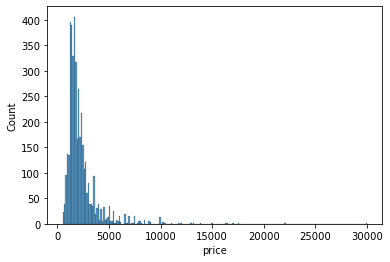

In [13]:
sns.histplot(data=df['price'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4227 entries, 0 to 5183
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4227 non-null   int64  
 1   url           4227 non-null   object 
 2   header        4227 non-null   object 
 3   address       4227 non-null   object 
 4   area          4227 non-null   int64  
 5   rooms         4227 non-null   int64  
 6   bathrooms     4227 non-null   int64  
 7   garages       4227 non-null   float64
 8   amenities     4227 non-null   object 
 9   price         4227 non-null   float64
 10  condo         4227 non-null   int64  
 11  crawler       4227 non-null   object 
 12  crawled_at    4227 non-null   object 
 13  neighborhood  4227 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 495.4+ KB


In [15]:
df.describe()

,id,area,rooms,bathrooms,garages,price,condo
count,4.227000e+03,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4.227000e+03
mean,2.511616e+09,73.711379,2.014904,1.572510,1.061273,2242.546487,8.162411e+02
std,9.006925e+07,52.475239,0.783475,0.817828,6.287126,1639.472303,1.924990e+04
min,7.413005e+07,10.000000,1.000000,1.000000,0.000000,500.000000,0.000000e+00
25%,2.515128e+09,50.000000,1.000000,1.000000,1.000000,1400.000000,2.870000e+02
50%,2.517746e+09,66.000000,2.000000,1.000000,1.000000,1800.000000,4.500000e+02
75%,2.519119e+09,84.000000,3.000000,2.000000,1.000000,2500.000000,6.350000e+02
max,2.520951e+09,2300.000000,5.000000,6.000000,407.000000,30000.000000,1.250000e+06


In [16]:
df = df.drop(['crawled_at','crawler','header','url'], axis=1)
df.shape

(4227, 10)

In [17]:
###Diving in Regions#####
##Dividindo em Zonas##
central = ['Central', 'Agronômica', 'Centro', 'Córrego Grande', 'Itacorubi', 'João Paulo','Joao Paulo', 'José Mendes', 
           'Monte Verde', 'Pantanal', 'Saco dos Limões', 'Saco Grande', 'Santa Mônica', 'Trindade', 'Carvoeira', 'Beira Mar', 
          'Parque São Jorge']

continental = ['Continental', 'Balneário do Estreito', 'Balneário', 'Bom Abrigo', 'Capoeiras', 'Coqueiros', 'Estreito',
               'Itaguaçu','Jardim Atlântico', 'Abraão', 'Monte Cristo', 'Coloninha', 'Canto']

norte = ['Norte', 'Cachoeira do Bom Jesus', 'Cacupé', 'Canasvieiras', 'Daniela', 'Ingleses do Rio Vermelho',
         'Jurerê Internacional', 'Jurerê Tradicional', 'Ponta das Canas', 'Praia Brava', 'Sambaqui',
        'Praia dos Ingleses', 'Santo Antônio de Lisboa', 'Santinho', 'Jurere',
         'Jurerê', 'Vargem Pequena', 'Vargem do Bom Jesus', 'Vargem Grande', 'São João do Rio Vermelho']

sul = ['Sul', 'Armação do Pântano do Sul', 'Campeche', 'Carianos', 'Costeira do Pirajubaé', 'Pântano do Sul',
       'Ribeirão da Ilha', 'Rio Tavares', 'Tapera', 'Armação', 'Morro das Pedras', 'Açores']

leste = ['Leste', 'Lagoa da Conceição', 'Barra da Lagoa', 'Porto da Lagoa', 'Canto da Lagoa']

def checar_zona(df,lista):
    df = df[df.address.str.contains(('|').join(lista))]
    df['zona'] = str(lista[0])
    return df

In [18]:
df1 = checar_zona(df,central)
df2 = checar_zona(df,continental)
df3 = checar_zona(df,norte)
df4 = checar_zona(df,sul)
df5 = checar_zona(df,leste)

<ipython-input-17-402aa3b3800b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zona'] = str(lista[0])


In [19]:
nenhuma = ['Nenhuma']

bairros = nenhuma + central + continental + norte + sul + leste

def checar_zona_nenhuma(df,lista):
    df = df[~df.address.str.contains(('|').join(lista))]
    df['zona'] = str(lista[0])
    return df

df6 = checar_zona_nenhuma(df,bairros)
df6.shape

<ipython-input-19-58c0286117b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zona'] = str(lista[0])


(1, 11)

In [20]:
df6.head()

,id,address,area,rooms,bathrooms,garages,amenities,price,condo,neighborhood,zona
2906,2519927384,"Rua Eleutério da Silva Furtado, 120 - Barreiro...",62,2,2,1.0,Mobiliado\nSalão de festas\nAr-condicionado\nC...,1300.0,320,Barreiros,Nenhuma


In [21]:
df_full = pd.concat([df1,df2,df3,df4,df5])

In [22]:
df_full.shape

(4248, 11)

In [23]:
df_full = df_full.drop_duplicates(subset=['id'], keep='last')
df_full.shape

(4226, 11)

In [24]:
df_full.index = df_full['id']
df_full = df_full.drop(['id'],axis=1)
df_full.head()

,address,area,rooms,bathrooms,garages,amenities,price,condo,neighborhood,zona
id,,,,,,,,,,
2512632181,"Rua Maestro Aldo Krieger, 54 - Córrego Grande,...",65,2,2,1.0,Elevador\nSalão de festas\nAr-condicionado\nCo...,1700.0,740,Córrego Grande,Central
2517219101,"Rua Maria Eduarda, 33 - Pantanal, Florianópoli...",35,1,1,0.0,Mobiliado\nElevador\nAr-condicionado\nCondomín...,1400.0,300,Pantanal,Central
2490117180,"Servidão do Palmeiras, 165 - Itacorubi, Floria...",20,1,1,0.0,Mobiliado\nAr-condicionado\nCondomínio fechado...,1200.0,0,Itacorubi,Central
2519612683,"Avenida César Seara - Carvoeira, Florianópolis...",53,2,2,1.0,Mobiliado\nElevador\nSalão de festas\nAcademia...,3000.0,1,Carvoeira,Central
2520075872,"Avenida Prefeito Osmar Cunha - Centro, Florian...",118,3,2,1.0,Elevador\nVaranda,1400.0,1100,Centro,Central


In [25]:
pd.DataFrame(df_full).to_csv("full_results_clean.csv", index=False)
#df_full.head()